In [1]:
# General libraries
import pickle
import numpy as np
import scipy.io as sio
import timeit
import copy 
import matplotlib.pyplot as plt
%matplotlib inline
import copy 

# Keras libraries
from keras.layers import Dense
#Dense(units, # Number of output neurons
#activation=None, # Activation function by name
#use_bias=True, # Use bias term or not
#kernel_initializer='glorot_uniform',
#bias_initializer='zeros')
from keras.layers import Dropout
#Dropout(rate, # Fraction of units to drop
#seed=None) # Random seed for reproducibility
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten
from keras.callbacks import Callback
#import tensorflow as tf


batch_size = 128
num_classes = 10
epochs = 20

C:\Programme\Programmierung\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import PIL
from PIL import Image
import cv2
import os
import argparse
import imutils

In [14]:
#!pip install --user imutils


Bild laden

In [15]:
# def LoadImage(image):
    

In [9]:
# Loading one image
x_images_list=[]
img="./Desktop/Zaehler/OpenCamera/IMG_20190120_195711.jpg"
img2 = Image.open(img)
img4 = np.asarray(img2)
x_images_list.append(img4)
x_images = np.array(x_images_list)
x_images = np.transpose(x_images, (1,2,3, 0))



# Cutting out ROI


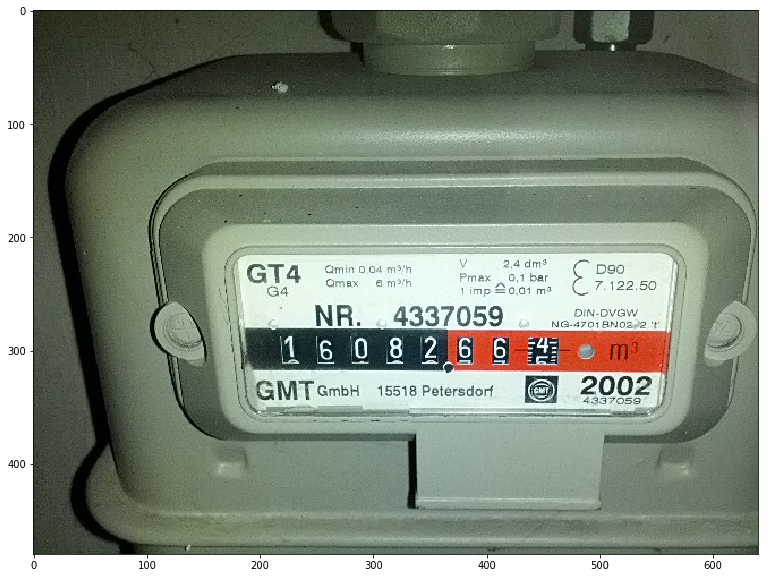

In [10]:
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(x_images[:,:,:,0])
plt.show()

In [11]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", help = "path to the image")
#args = vars(ap.parse_args())
 
# load the image
image = cv2.imread("./Desktop/Zaehler/OpenCamera/IMG_20190120_195711.jpg")

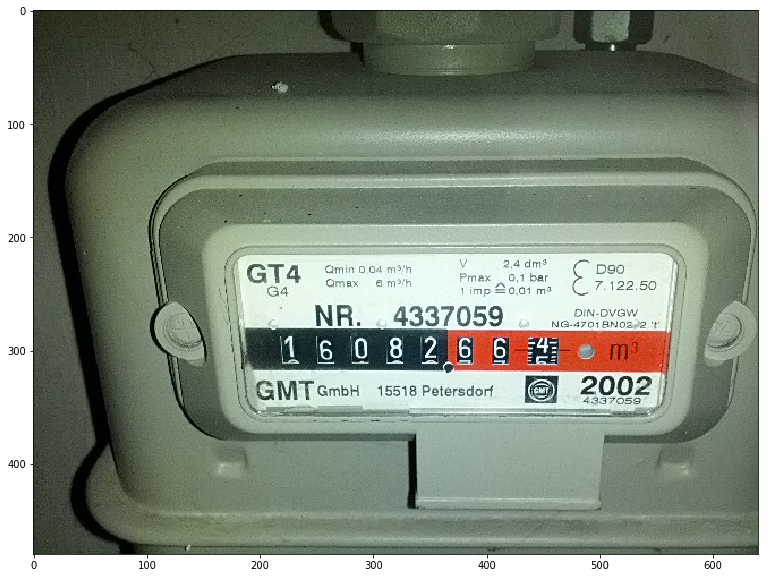

In [38]:


screen_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(screen_image)
plt.show()

In [5]:
# define shades of red
shades_of_red = [([17, 15, 100], [50, 56, 200])]

In [14]:
# loop over the boundaries
for (lower, upper) in shades_of_red:
    # create NumPy arrays from the shades_of_red
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    #mask = cv2.inRange(image, lower, upper)
    mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
    mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))
    mask = cv2.bitwise_or(mask1, mask2 )


    output = cv2.bitwise_and(image, image, mask = mask)
 
    # show the images
    cv2.imshow("images", np.hstack([image, output]))
    cv2.waitKey(0)

In [15]:
# find the colors within the specified boundaries and apply
# the mask
#mask = cv2.inRange(image, lower, upper)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(img_hsv, (0,50,20), (10,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (185,255,255))
mask = cv2.bitwise_or(mask1, mask2 )


output = cv2.bitwise_and(image, image, mask = mask)

# show the images
cv2.imshow("images", np.hstack([image, output]))
cv2.waitKey(0)

13

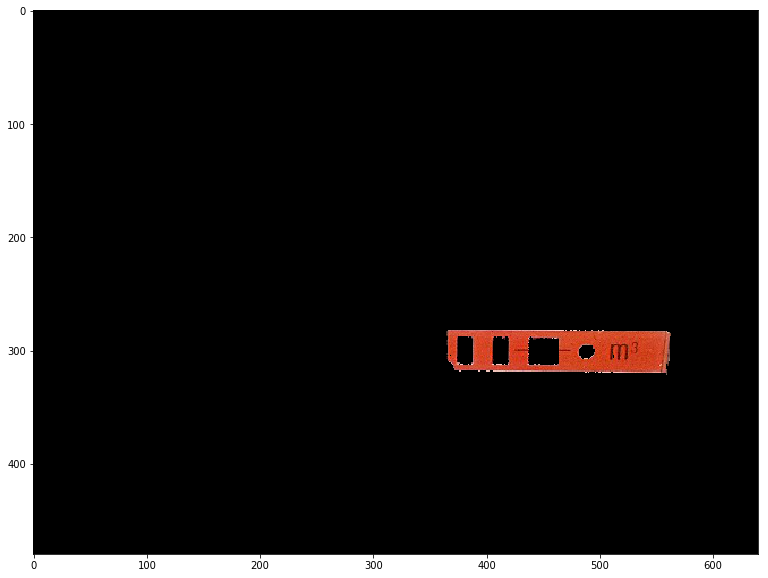

In [16]:
screen_output = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(screen_output)
plt.show()

In [23]:
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

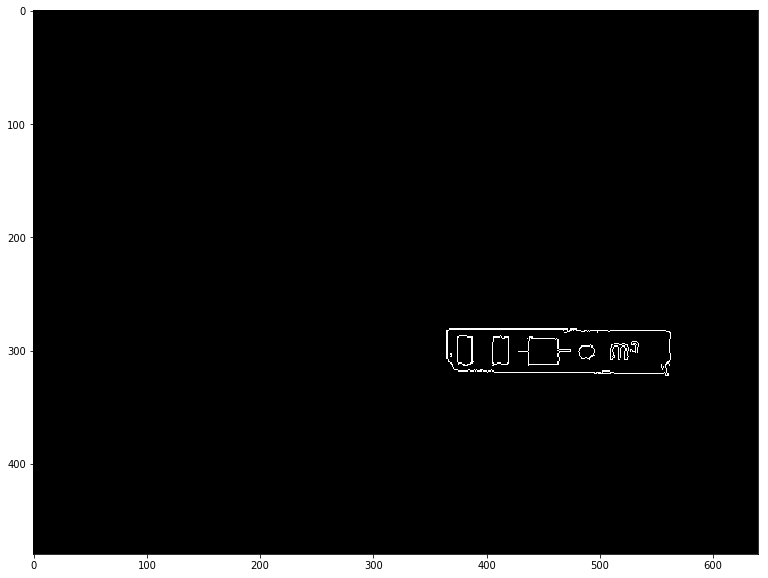

In [26]:
screen_output = cv2.cvtColor(edged, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(screen_output)
plt.show()

In [30]:
#imgray = cv2.cvtColor(edged, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(edged, 127, 255, 0)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cnts = imutils.grab_contours(contours)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:1]
#screenCnt = None

In [32]:
print(cnts)

[array([[[367, 281]],

       [[366, 282]],

       [[365, 282]],

       [[365, 307]],

       [[366, 308]],

       [[366, 310]],

       [[367, 310]],

       [[370, 313]],

       [[370, 314]],

       [[371, 315]],

       [[371, 316]],

       [[372, 317]],

       [[374, 317]],

       [[375, 318]],

       [[383, 318]],

       [[384, 317]],

       [[385, 317]],

       [[386, 318]],

       [[388, 318]],

       [[389, 317]],

       [[390, 318]],

       [[391, 317]],

       [[392, 318]],

       [[395, 318]],

       [[396, 317]],

       [[397, 318]],

       [[400, 318]],

       [[401, 319]],

       [[402, 318]],

       [[403, 318]],

       [[404, 317]],

       [[405, 318]],

       [[406, 318]],

       [[407, 319]],

       [[494, 319]],

       [[495, 320]],

       [[497, 320]],

       [[498, 319]],

       [[499, 320]],

       [[509, 320]],

       [[510, 319]],

       [[512, 319]],

       [[513, 320]],

       [[556, 320]],

       [[557, 319]],

       [[

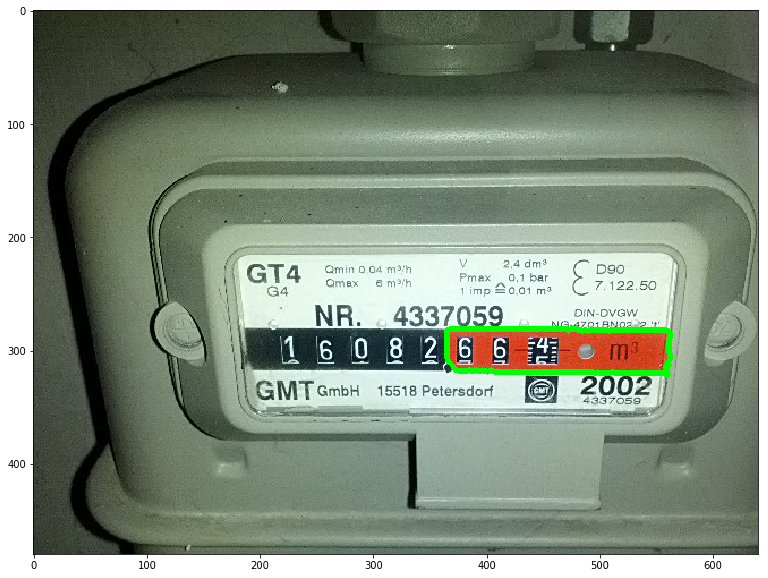

In [39]:
#img = cv2.drawContours(screen_image, cnts, 3, (0,255,0), 3)
img = cv2.drawContours(screen_image, cnts, -1, (0,255,0), 3)
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(img)
plt.show()

In [19]:

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2.imshow("Game Boy Screen", image)
cv2.waitKey(0)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\drawing.cpp:2612: error: (-215) reader.ptr != 0 in function cvDrawContours


In [43]:

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.010 * peri, True)
    print(approx)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 5:
        screenCnt = approx
        break

[[[365 282]]

 [[365 307]]

 [[375 318]]

 [[560 322]]

 [[558 282]]]


In [47]:
screenCnt[:,0,:]

array([[365, 282],
       [365, 307],
       [375, 318],
       [560, 322],
       [558, 282]], dtype=int32)

In [55]:
from operator import itemgetter
def key(s):
    return s[0]
#leftCnt = sorted(screenCnt[:,0,:], key = itemgetter(0), reverse = False)[:2]
leftCnt = np.argsort(screenCnt[:,0,0])[:2]
print(leftCnt)
#bottomCnt = sorted(screenCnt[:,0,:], key = itemgetter(1), reverse = True)[:2]
bottomCnt = np.argsort(screenCnt[:,0,1])[-2:]
print(bottomCnt)

[0 1]
[2 3]


In [42]:
print(screenCnt)

[[[365 282]]

 [[375 318]]

 [[560 322]]

 [[558 282]]]


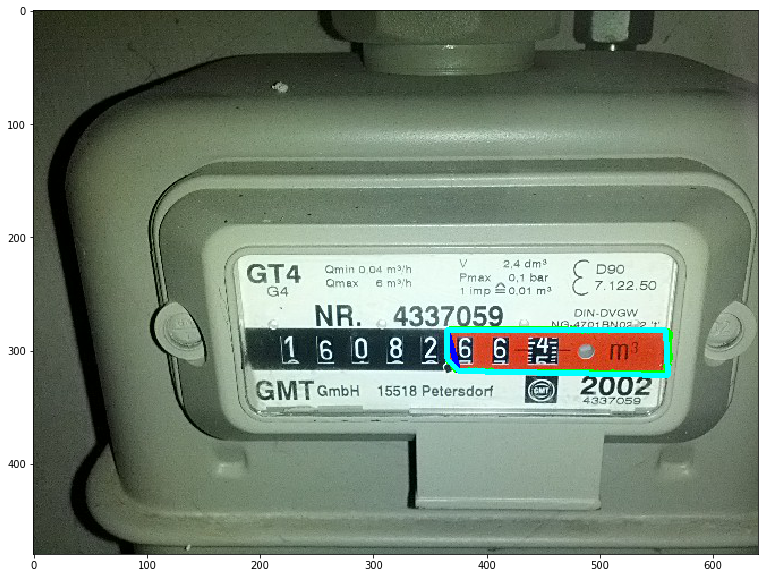

In [45]:
img = cv2.drawContours(screen_image, [screenCnt], -1, (0,255,255), 3)
plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
plt.imshow(img)
plt.show()

In [22]:
print(cnts)

[array([[[559, 283]],

       [[559, 284]],

       [[560, 285]],

       [[559, 286]],

       [[559, 290]],

       [[560, 291]],

       [[559, 292]],

       [[559, 295]],

       [[558, 296]],

       [[558, 302]],

       [[559, 302]],

       [[558, 301]],

       [[559, 300]],

       [[558, 299]],

       [[558, 298]],

       [[559, 297]],

       [[558, 296]],

       [[560, 294]],

       [[560, 293]],

       [[559, 292]],

       [[561, 290]],

       [[561, 287]],

       [[560, 287]],

       [[559, 286]],

       [[561, 284]],

       [[560, 284]]], dtype=int32), array([[[558, 306]],

       [[557, 307]],

       [[557, 314]],

       [[556, 315]],

       [[556, 318]],

       [[555, 319]],

       [[556, 319]],

       [[557, 318]],

       [[558, 319]],

       [[557, 318]],

       [[558, 317]],

       [[557, 316]],

       [[558, 315]],

       [[557, 314]],

       [[558, 313]],

       [[557, 312]],

       [[557, 311]],

       [[558, 310]],

       [[557, 309

In [22]:
#cv2.drawContours(image, contours, -1, (0,255,0), 3)
cnt = contours[1]
cv2.drawContours(image, [cnt], 0, (0,255,0), 3)

TypeError: contours is not a numpy array, neither a scalar

# Reading in images

In [9]:
# loading all images in a folder
path = "./Desktop/Zaehler/OpenCamera/"
x_images_list=[]
for filename in os.listdir(path):
    # do your stuff
    if filename[0]!= '.':
    #img="./Desktop/Zaehler/OpenCamera/IMG_20190120_185658.jpg"
        img = path + filename
        img2 = Image.open(img)
        img4 = np.asarray(img2)
        x_images_list.append(img4)
x_images = np.array(x_images_list)
print(x_images.shape)
#x_images = np.transpose(x_images, (1,2,3, 0))
x_images.dtype

(1644, 480, 640, 3)


In [16]:
type(x_images)
#x_images.dtype

numpy.ndarray

In [54]:
x_images=np.delete(x_images,[0,10])
print(x_images.shape)

(1641,)


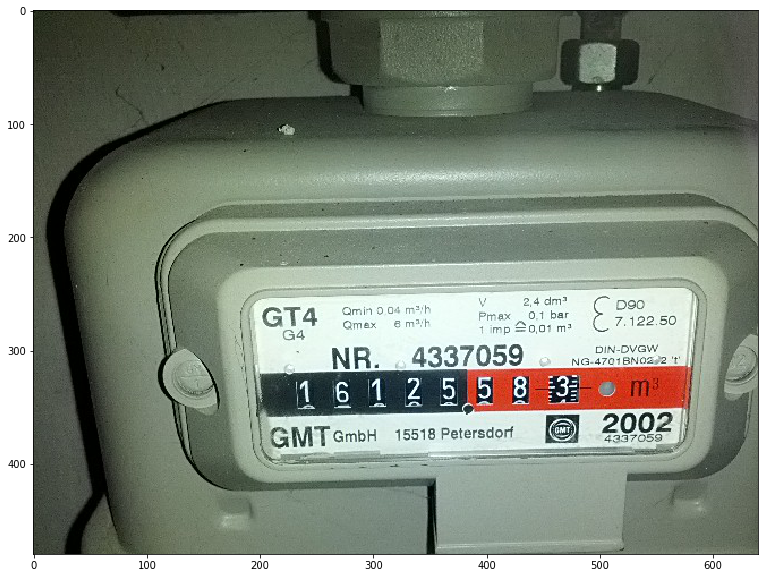

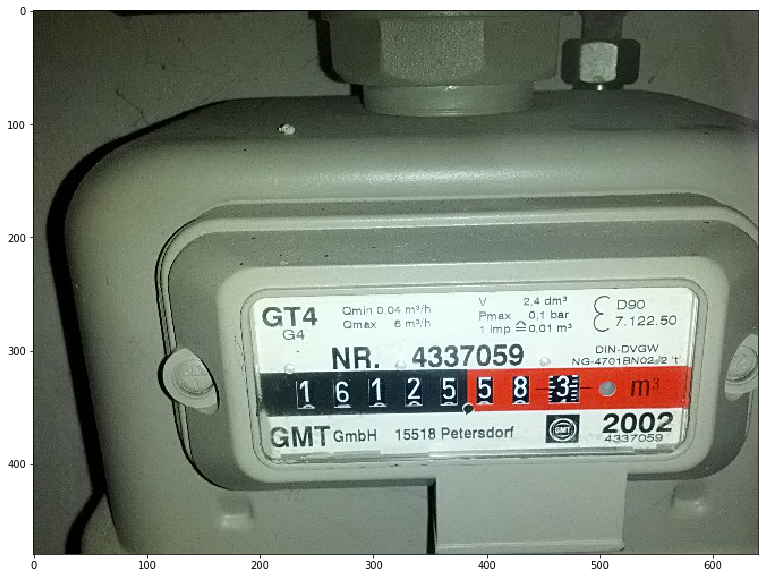

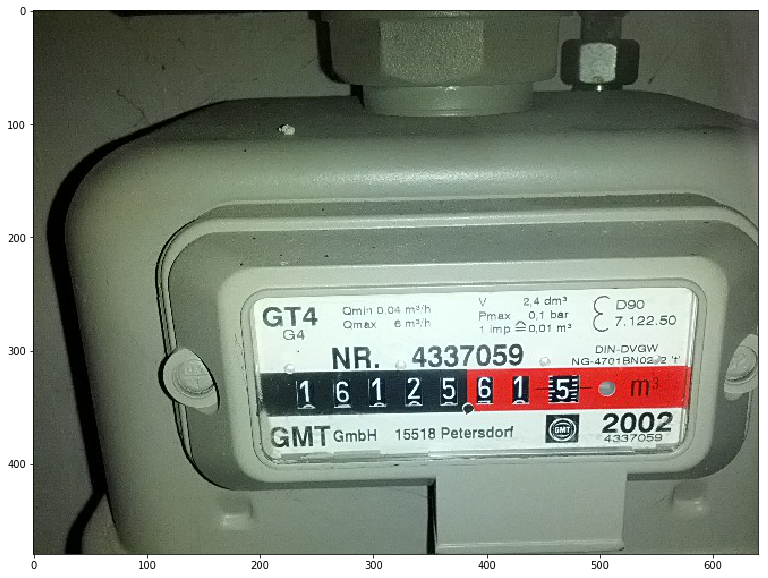

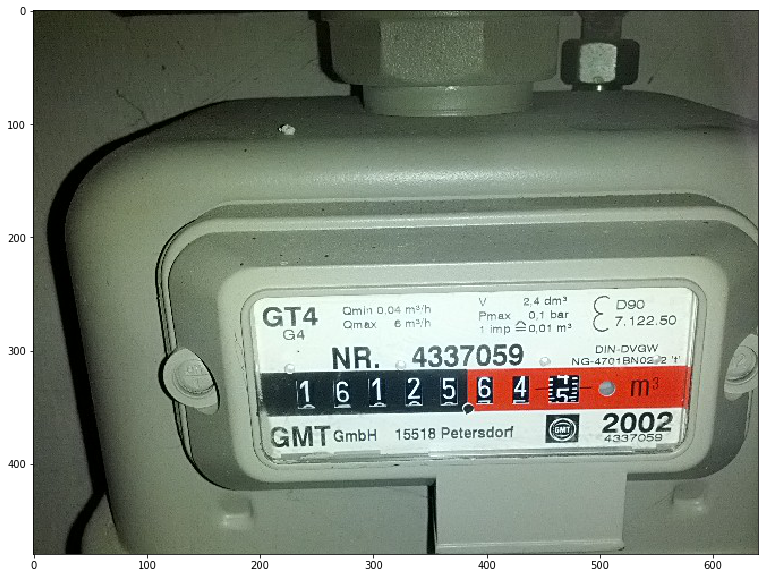

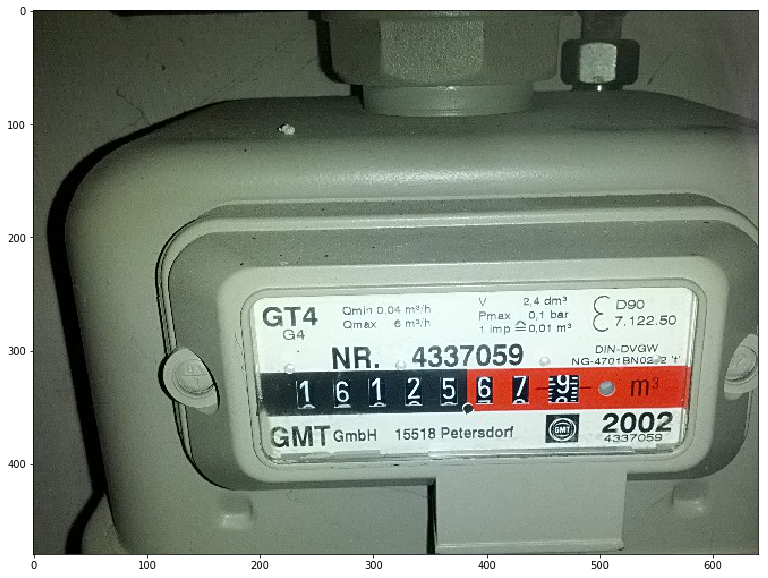

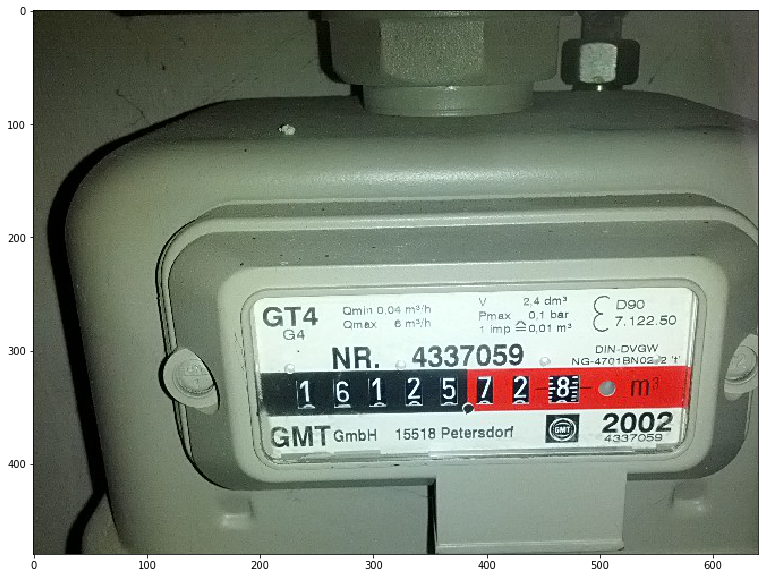

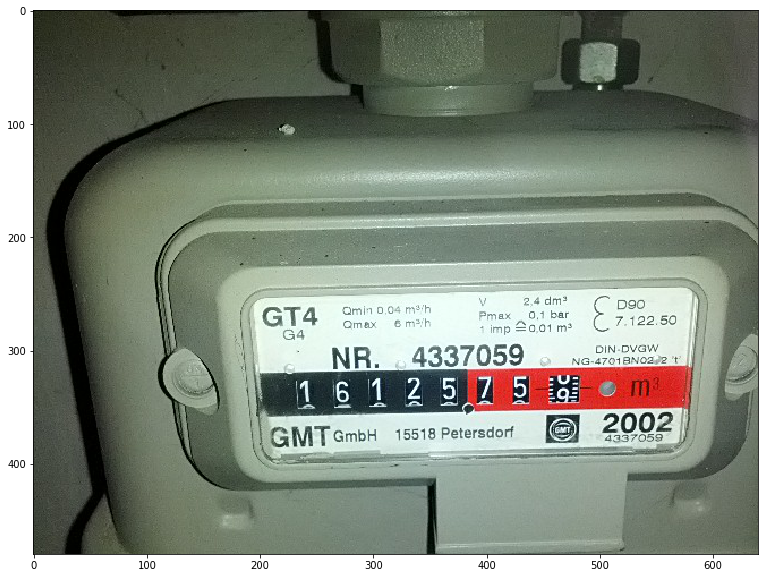

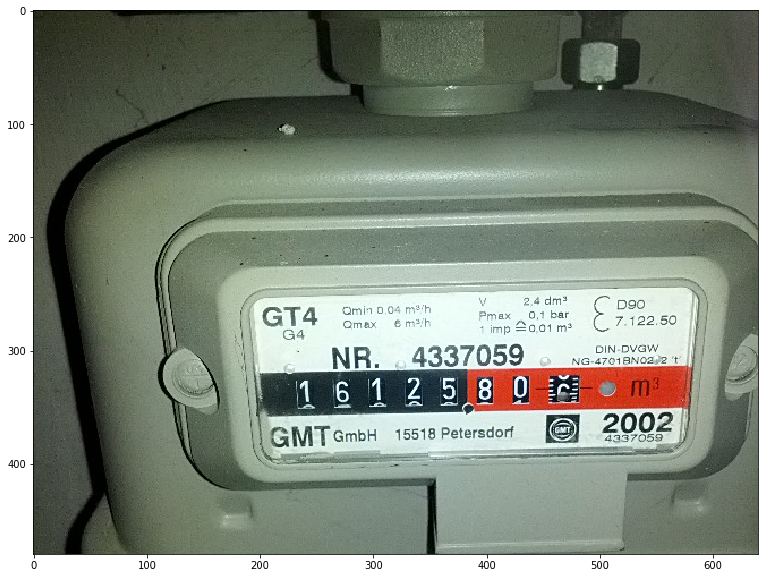

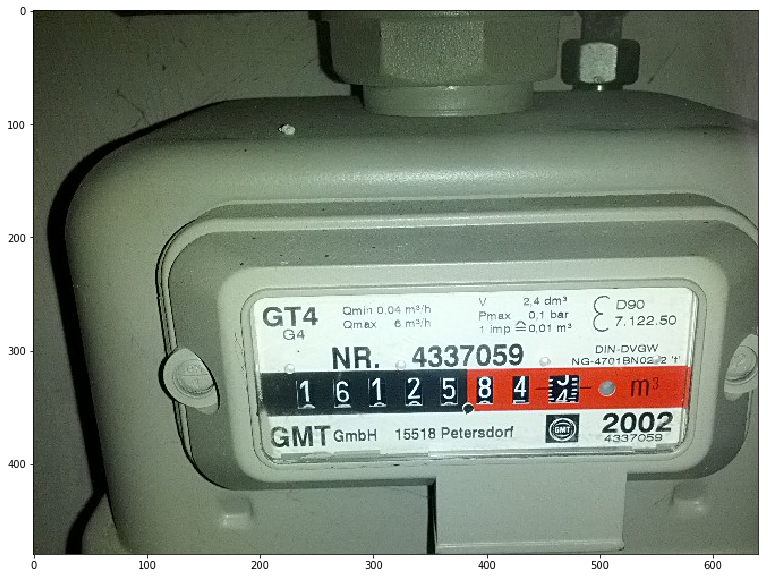

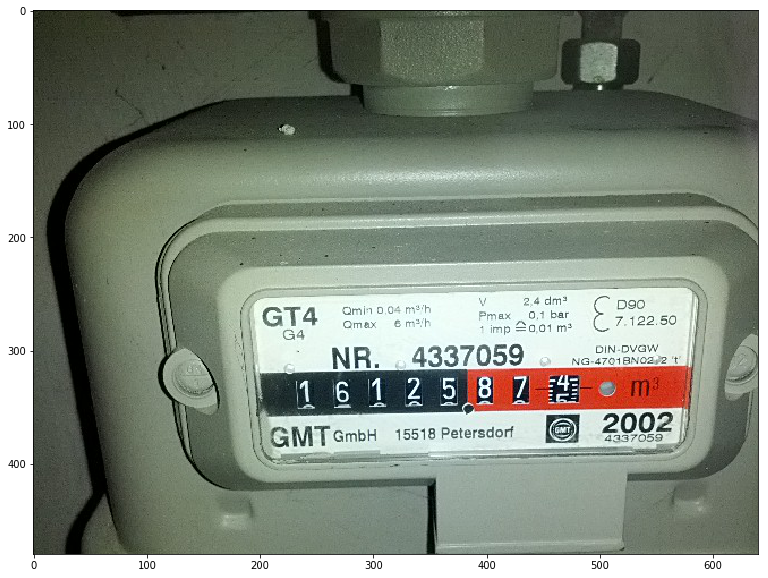

In [93]:
for ind in range(10):
    plt.figure(figsize=(20,10))
   # plt.imshow(x_images[ind])
    plt.imshow(x_images[ind+1000,:,:,:])
    plt.show()

In [17]:
refPt=[[203,278],[424,316]]
clone = x_images[0].copy()
if len(refPt) == 2:
    print (refPt)
    roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
    cv2.imshow("ROI", roi)

[[203, 278], [424, 316]]


In [89]:
print (refPt)
anfang =refPt[0][0]
print (anfang)
ende = refPt[1][0]

siebentel_breite = int(abs(refPt[0][0]-refPt[1][0])/7.0)
print (siebentel_breite)

# numbers=[]
# numbers_list=[]
# all_numbers=[]
# for meter_reading in range(10):
#     individual_numbers=[]
#     for ind in range(7):
#         siebentel = x_images[meter_reading,refPt[0][1]+6:refPt[1][1]-8, \
# #                         int(anfang+siebentel_breite*(ind)+12):int(anfang+siebentel_breite*(ind+1)-8),:,0]
#                 (anfang+siebentel_breite*(ind)+12):(anfang+siebentel_breite*(ind)+28),:]
#         #plt.imshow(siebentel)
#         #plt.show()
#         #numb = np.asarray(siebentel)
#         individual_numbers.append(siebentel)
#         #print (individual_numbers.shape)
#     individual_numbers_array=np.asarray(individual_numbers)
#     numbers.append(individual_numbers_array)
# numbers_array=np.asarray(numbers)
# print (numb.shape)


numbers_array=x_images[:,refPt[0][1]+6:refPt[1][1]-2,anfang+13:anfang+13+siebentel_breite*7,:]
numbers_array=numbers_array.reshape(numbers_array.shape[0],numbers_array.shape[1],7,siebentel_breite,numbers_array.shape[3])
numbers_array=numbers_array[:,:,:,:25,:]
numbers_array=numbers_array.transpose(0,2,1,3,4)
#numbers_array=np.array(numbers)
#print(type(individual_numbers))
#print (individual_numbers_array.shape)
print (numbers_array.shape)


[[203, 278], [424, 316]]
203
31
(1644, 7, 30, 25, 3)


In [77]:
for ind in range(7):
    plt.imshow(numbers[ind])
    plt.show()

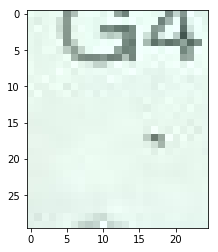

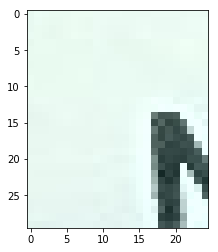

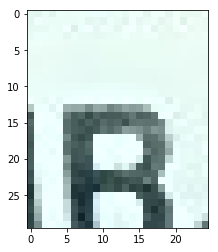

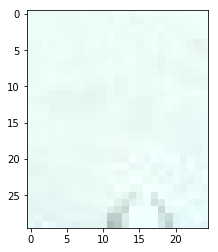

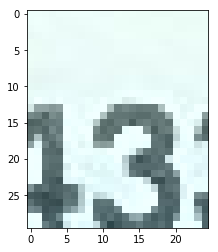

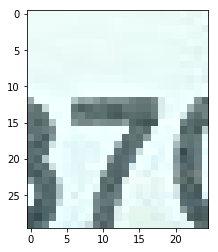

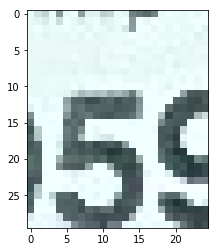

In [92]:
for ind in range(7):
    plt.imshow(numbers_array[1000,ind])
    plt.show()
    
# plt.imshow(numbers[1,:,:,:])
# plt.show()

In [10]:

test_data = numbers.astype('float32') / 256

# reshaping np array so that we can access data in CNN friendly format i.e. [i,:,:,:] from [:,:,:,i]
#train_data = np.transpose(train_data, (3, 0, 1, 2))
#test_data = np.transpose(test_data,(3, 0, 1, 2))



print ('Test data:', test_data.shape)

NameError: name 'numbers' is not defined

In [11]:
numb_test=7
reshaped_test_data=[]

for ind in range(numb_test):
    img=cv2.resize(test_data[ind], dsize=(22, 32), interpolation=cv2.INTER_LINEAR)
    reshaped_test_data.append(img)
    

reshaped_test_data = np.asarray(reshaped_test_data)
reshaped_test_data.shape

NameError: name 'test_data' is not defined

In [12]:
for ind in range(7):
    plt.imshow(reshaped_test_data[0+ind])
    plt.show()

IndexError: list index out of range

In [13]:
out2 = model.predict(reshaped_test_data[0:7])
#y =y_test_small.reshape([-1])

print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:7])

NameError: name 'model' is not defined

In [ ]:
LoagImage

In [3]:
# Load digits
digits = pickle.load( open( "digits.pck", "rb" ) )


In [4]:
digits =np.array(digits,dtype=float)

In [5]:
print (digits.shape)
print (digits)

(700,)
[1. 0. 1. 1. 2. 2. 7. 1. 0. 1. 1. 2. 4. 1. 1. 0. 1. 1. 2. 4. 5. 1. 0. 1.
 1. 2. 5. 8. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6.
 5. 1. 0. 1. 1. 2. 6. 5. 1. 0. 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 6. 9. 1. 0.
 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 6. 9. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2.
 7. 2. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2. 7. 2. 1. 0. 1. 1. 2. 7. 6. 1.
 0. 1. 1. 3. 0. 9. 1. 0. 1. 1. 3. 3. 1. 1. 0. 1. 1. 3. 4. 2. 1. 0. 1. 1.
 3. 5. 7. 1. 0. 1. 1. 3. 6. 7. 1. 0. 1. 1. 3. 7. 7. 1. 0. 1. 1. 3. 8. 7.
 1. 0. 1. 1. 4. 0. 0. 1. 0. 1. 1. 4. 1. 1. 1. 0. 1. 1. 4. 2. 4. 1. 0. 1.
 1. 4. 3. 3. 1. 0. 1. 1. 4. 4. 6. 1. 0. 1. 1. 4. 6. 0. 1. 0. 1. 1. 4. 7.
 0. 1. 0. 1. 1. 4. 8. 0. 1. 0. 1. 1. 4. 9. 0. 1. 0. 1. 1. 4. 9. 5. 1. 0.
 1. 1. 5. 0. 5. 1. 0. 1. 1. 5. 1. 6. 1. 0. 1. 1. 5. 2. 2. 1. 0. 1. 1. 5.
 3. 2. 1. 0. 1. 1. 5. 4. 3. 1. 0. 1. 1. 5. 5. 9. 1. 0. 1. 1. 5. 6. 7. 1.
 0. 1. 1. 5. 7. 5. 1. 0. 1. 1. 5. 8. 5. 1. 0. 1. 1. 5. 9. 0. 1. 0. 1. 1.
 6. 0. 5. 1. 0. 1. 1. 6. 1. 3. 1. 0. 1. 1. 6

In [6]:
# Print a diagram of the distribution of values
def printFrequencyDistribution(y_train_values, y_test_values,number_labels):
    test_value_distribution = valueDistribution(y_test_values)
    train_value_distribution = valueDistribution(y_train_values)
    #test_value_distribution = np.unique(y_test_values, return_counts=True)
    #train_value_distribution = np.unique(y_train_values, return_counts=True)
    ind = np.arange(number_labels) 

    plt.bar(ind, train_value_distribution[1], align='center', color='blue', label='Training Labels')
    plt.bar(ind, test_value_distribution[1], align='center', color='red', label='Testing Labels')
    plt.legend()
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Label Occurences')
    plt.title('Frequency Distribution of Class Labels')
    plt.show()
    plt.show()
    print (train_value_distribution)


In [7]:
# number of values for each class
def valueDistribution(values):
    return np.unique(values, return_counts=True)

In [8]:
# Load digits
numbers = pickle.load( open( "numbers.pck", "rb" ) )
numbers.shape


(700, 37, 26, 3)

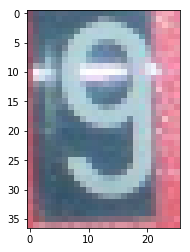

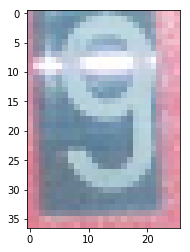

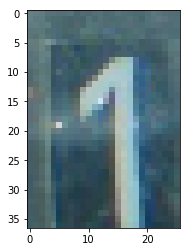

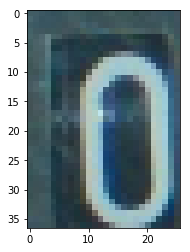

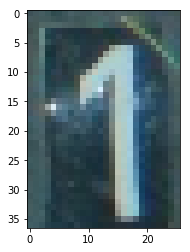

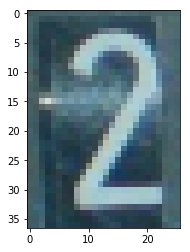

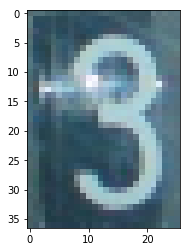

In [9]:
for ind in range(7):
    plt.imshow(numbers[600+ind])
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numbers, digits, test_size=0.10)
numb_train = X_train.shape[0]
numb_test= X_test.shape[0]

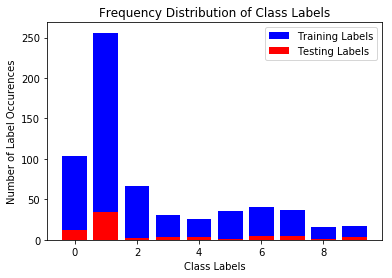

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([104, 256,  67,  31,  26,  35,  41,  37,  16,  17], dtype=int64))


In [11]:
num_classes=10
printFrequencyDistribution(y_train, y_test,num_classes)  

In [12]:
print (valueDistribution(y_train)[1])

[104 256  67  31  26  35  41  37  16  17]


In [13]:
X_train.shape

(630, 37, 26, 3)

In [14]:
print (y_train[:10])
print (y_train.dtype)

[6. 1. 1. 1. 0. 1. 0. 4. 1. 1.]
float64


In [15]:
# Select an equal number of samples from both x_values and y_values
def valueSelection(x_values,y_values,cut):
    selector = np.ones((len(y_values)), dtype=bool)
    selector[0:10]
    for ind in range(0,11):
        sel =y_values[:]==ind
        sel[np.argwhere(sel)[:cut]]=0
        selector[sel] = 0
    y_selection=y_values[selector]
    x_selection=x_values[selector,:,:,:]
    return (x_selection,y_selection)

In [16]:
# getting an equal number of values for each class
#train_min = np.min(valueDistribution(y_train)[1])
#test_min = np.min(valueDistribution(y_test)[1])
train_min = valueDistribution(y_train)[1][6]
# reduced number of classes
#train_min = 2000
#test_min = 1500
x_train_small,y_train_small=valueSelection(X_train,y_train,train_min)
#x_test_small,y_test_small=valueSelection(x_test_cut,y_test,test_min)
numb_train=len(x_train_small)
print (train_min)
print (x_train_small.shape)
print (y_train_small.shape)

41
(326, 37, 26, 3)
(326,)


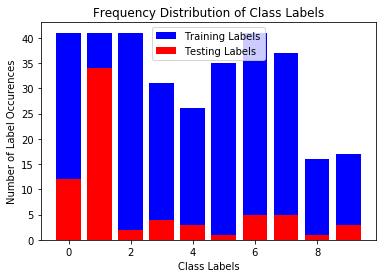

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([41, 41, 41, 31, 26, 35, 41, 37, 16, 17], dtype=int64))


In [17]:

printFrequencyDistribution(y_train_small,y_test,num_classes) 

# Feature Creation

In [18]:
train_data = x_train_small.astype('float32') / 256
test_data = X_test.astype('float32') / 256

# reshaping np array so that we can access data in CNN friendly format i.e. [i,:,:,:] from [:,:,:,i]
#train_data = np.transpose(train_data, (3, 0, 1, 2))
#test_data = np.transpose(test_data,(3, 0, 1, 2))

#changing class labels range 1-10 to 0-9
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
y_train_small[y_train_small == 10] = 0

# processing labels in CNN friendly format i.e. 1-hot-encoding

train_labels = to_categorical(y_train_small[:])
test_labels = to_categorical(y_test[:])
#train_labels = (np.arange(num_classes) == train_labels[:, None]).astype(np.float32)
#test_labels = (np.arange(num_classes) == test_labels[:, None]).astype(np.float32)

print ('Train data:', train_data.shape,', Train labels:', train_labels.shape)
print ('Test data:', test_data.shape,', Test labels:', test_labels.shape)

Train data: (326, 37, 26, 3) , Train labels: (326, 10)
Test data: (70, 37, 26, 3) , Test labels: (70, 10)


In [19]:
# adapt image size to model requirements

import cv2

reshaped_train_data=[]
reshaped_test_data=[]
for ind in range(numb_train):
    img=cv2.resize(train_data[ind], dsize=(22, 32), interpolation=cv2.INTER_LINEAR)
    reshaped_train_data.append(img)
for ind in range(numb_test):
    img=cv2.resize(test_data[ind], dsize=(22, 32), interpolation=cv2.INTER_LINEAR)
    reshaped_test_data.append(img)
    
reshaped_train_data = np.asarray(reshaped_train_data)
reshaped_test_data = np.asarray(reshaped_test_data)

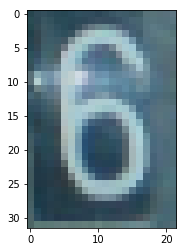

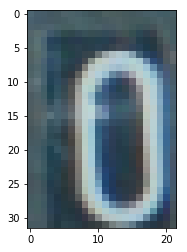

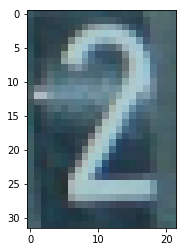

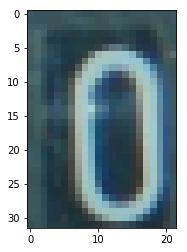

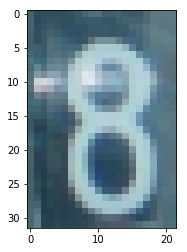

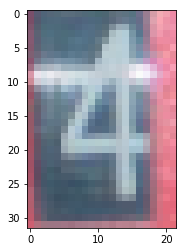

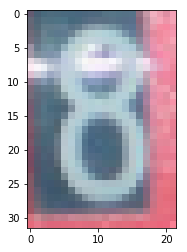

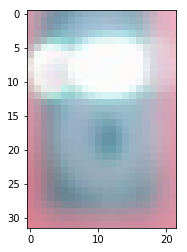

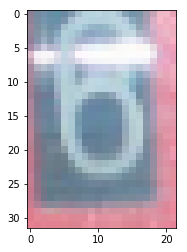

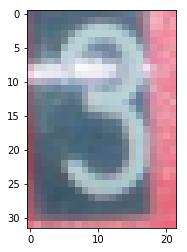

In [20]:
for ind in range(10):
    plt.imshow(reshaped_train_data[90+ind])
    plt.show()

In [21]:
# Load model if required
model = pickle.load( open( "modelCNN.pck", "rb" ) )

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 20, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 20, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                307264    
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [23]:
model_weights=model.get_weights()

In [24]:
import timeit

start = timeit.default_timer()

epochs=50
batch_size=44
result= model.fit(reshaped_train_data, train_labels, batch_size=batch_size,
          epochs=epochs, validation_data=(reshaped_test_data, test_labels))
stop = timeit.default_timer()

print('Time: ', stop - start)  

Train on 326 samples, validate on 70 samples
Epoch 1/50
326/326 [==============================] - 0s 1ms/step - loss: 1.1748 - acc: 0.5644 - val_loss: 0.4668 - val_acc: 0.8143
Epoch 2/50
326/326 [==============================] - 0s 410us/step - loss: 0.8511 - acc: 0.6933 - val_loss: 0.3330 - val_acc: 0.9000
Epoch 3/50
326/326 [==============================] - 0s 410us/step - loss: 0.7169 - acc: 0.7117 - val_loss: 0.3158 - val_acc: 0.8714
Epoch 4/50
326/326 [==============================] - 0s 416us/step - loss: 0.6154 - acc: 0.7209 - val_loss: 0.2731 - val_acc: 0.9000
Epoch 5/50
326/326 [==============================] - 0s 410us/step - loss: 0.7178 - acc: 0.7209 - val_loss: 0.2695 - val_acc: 0.9143
Epoch 6/50
326/326 [==============================] - 0s 407us/step - loss: 0.5870 - acc: 0.7607 - val_loss: 0.2842 - val_acc: 0.9000
Epoch 7/50
326/326 [==============================] - 0s 441us/step - loss: 0.5398 - acc: 0.7791 - val_loss: 0.2584 - val_acc: 0.9143
Epoch 8/50
326/326 

Text(0.5,1,'Accuracy Curves')

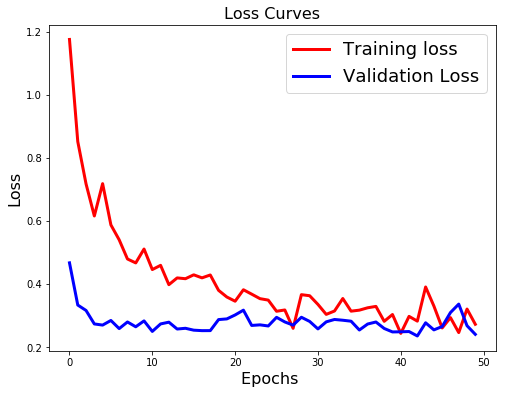

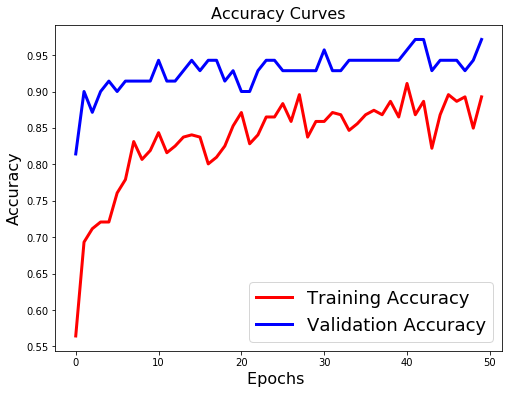

In [25]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['loss'],'r',linewidth=3.0)
plt.plot(result.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['acc'],'r',linewidth=3.0)
plt.plot(result.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
print (test_labels.shape)
#test_labels_small =y_test_small[:,0]

out2 = model.predict(reshaped_test_data[0:100])
#y =y_test_small.reshape([-1])
print ('Correct Values:',np.array(y_test[0:100],int))
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:20])


(70, 10)
Correct Values: [3 0 1 1 1 1 1 3 1 1 1 1 6 1 6 0 0 4 0 0 9 7 1 0 0 1 1 6 1 1 7 1 0 3 3 1 7
 6 4 5 2 0 1 1 9 1 8 1 1 0 1 9 0 2 1 6 1 1 1 7 1 1 1 1 1 7 1 1 0 4]
Prediction:     [3 0 1 1 1 1 1 3 1 1 1 1 6 1 6 0 0 4 0 0 9 7 1 0 0 1 1 6 1 1 9 1 0 3 3 1 7
 6 4 5 2 0 1 1 6 1 8 1 1 0 1 9 0 2 1 6 1 1 1 7 1 1 1 1 1 7 1 1 0 4]
[[1.7868667e-12 7.2059741e-13 2.2443996e-11 9.9997580e-01 7.1371745e-12
  9.6254792e-07 3.5886469e-08 1.4333848e-07 2.0898213e-07 2.2891667e-05]
 [1.0000000e+00 5.9326689e-14 8.5569124e-31 7.3792517e-23 1.5139890e-25
  2.5619779e-32 9.4369491e-15 1.9546273e-24 2.7757549e-13 3.9144491e-13]
 [9.4256580e-10 1.0000000e+00 5.9765536e-18 8.6983269e-17 1.3167997e-10
  1.9138488e-23 9.9501796e-18 7.5419063e-12 1.8469583e-16 3.9901679e-18]
 [1.4348643e-07 9.9999845e-01 1.0886318e-14 2.2181125e-10 1.4510036e-06
  1.6238513e-15 1.2678153e-12 1.7902053e-09 1.7107087e-11 3.0641670e-12]
 [1.8012342e-08 1.0000000e+00 2.7953886e-19 2.8979469e-16 5.9685954e-09
  2.6369421e-22 3.390

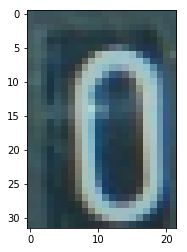

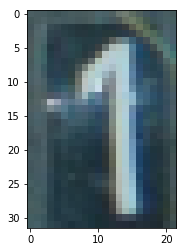

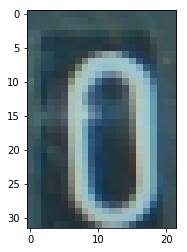

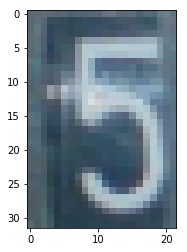

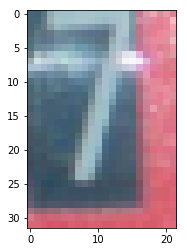

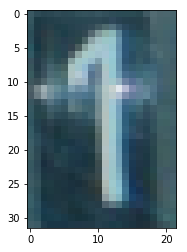

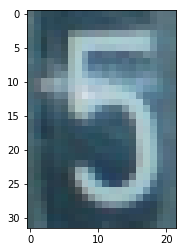

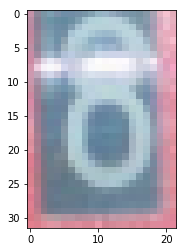

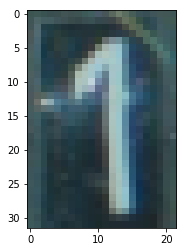

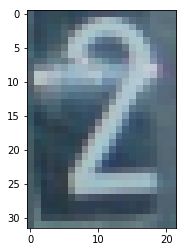

In [26]:
for ind in range(10):
    plt.imshow(reshaped_test_data[0+ind])
    plt.show()

In [27]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [59]:
x = np.array(y_test)
y = np.array(np.argmax(out2, axis=1))
print(x)
print(y)

trace = go.Scatter(x=x, y=y,mode='markers')
#trace = go.Scatter(y_test,out2)
plot([trace], 'images/fig1.png')

[0. 1. 0. 5. 7. 1. 5. 8. 1. 2. 2. 5. 6. 2. 3. 6. 0. 2. 3. 1. 4. 2. 0. 1.
 1. 1. 1. 1. 7. 3. 2. 1. 1. 1. 1. 1. 1. 9. 6. 1. 0. 0. 8. 1. 9. 1. 0. 1.
 1. 4. 1. 3. 6. 3. 0. 4. 1. 8. 7. 0. 1. 1. 3. 6. 8. 2. 1. 2. 6. 2.]
[1 6 0 0 2 4 1]


'file://C:\\Users\\Anne\\temp-plot.html'

In [ ]:
227 314
221 30